In [306]:
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd


fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [307]:
# Enable the cache
ff1.Cache.enable_cache('fastf1_cache') 


In [308]:
test2023 = ff1.get_event_schedule(2023)
#test2023.head()
#print(test2023)

In [309]:
sessionQ = ff1.get_session(2023, 7, 'Q') #get qualifying

#miami_laps = miami_race.load_laps(with_telemetry=True)
#miami_sectors = miami_race.load_sectors(with_telemetry=True)
#miami_laps.head()
sessionQ.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '23', '2', '24', '22', '14', '27', '20', '63', '77', '31', '44', '16', '10', '4', '55', '18', '11', '81', '21']


In [310]:
ver_lap = sessionQ.laps.pick_driver('VER').pick_fastest()
lec_lap = sessionQ.laps.pick_driver('LEC').pick_fastest()
alo_lap = sessionQ.laps.pick_driver('ALO').pick_fastest()

In [311]:
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
alo_tel = alo_lap.get_car_data().add_distance()

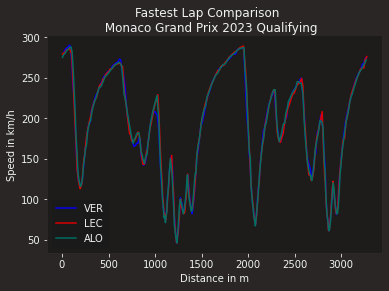

In [312]:
rbr_color = fastf1.plotting.team_color('RBR')
fer_color = fastf1.plotting.team_color('FER')
amr_color = fastf1.plotting.team_color('aston martin')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(lec_tel['Distance'], lec_tel['Speed'], color=fer_color, label='LEC')
ax.plot(alo_tel['Distance'], alo_tel['Speed'], color=amr_color, label='ALO')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{sessionQ.event['EventName']} {sessionQ.event.year} Qualifying")

plt.show()

In [313]:
sessionR = ff1.get_session(2023, 7, 'R')
sessionR.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '27', '20', '2', '77', '18', '23', '21', '81', '4', '22', '63', '10', '16', '44', '55', '31', '14', '24', '11']
